In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import scipy.stats

In [2]:
ResultsPath = '../../Data/SummaryResults/'
ClusteringPath = '../../Data/ClusteringResults/'
FiguresPath = '../../Data/Figures/'
if not os.path.isdir(FiguresPath):
    os.mkdir(FiguresPath)
ExpectedRegionCount=28
ExpectedImageCount=221


In [3]:
#step 1: load all the summary results for each image
ML_df = pd.read_csv(ResultsPath+'SemanticSegmenterCNN_LORO_by_regions.csv',index_col=0)
ML_image_df = pd.read_csv(ResultsPath+'SemanticSegmenterCNN_LORO_by_image.csv',index_col=0)
Clustering_df = pd.read_csv(ClusteringPath+'Clustering_by_region.csv',index_col=0)
Clustering_image_df = pd.read_csv(ClusteringPath+'Clustering_by_image.csv',index_col=0)

ML_df['Bubblesize']=(np.square(ML_df['Region Dice'])*3000).astype('int')
Clustering_df['Bubblesize']=(np.square(Clustering_df['Region Dice'])*3000).astype('int')

ML_image_df['Bubblesize']=(np.square(ML_image_df['Dice'])*3000).astype('int')
Clustering_image_df['Bubblesize']=(np.square(Clustering_image_df['Dice'])*3000).astype('int')

ML_df=ML_df.sort_values('Region Dice')
Clustering_df=Clustering_df.reindex(ML_df.index)

assert ML_image_df.shape[0]==ExpectedImageCount
assert Clustering_image_df.shape[0]==ExpectedImageCount
assert ML_df.shape[0]==ExpectedRegionCount
assert Clustering_df.shape[0]==ExpectedRegionCount

In [4]:
ML_df

,NumImages,Total TP,Total FP,Total FN,Total TN,Total Centre P4 Count,Total Centre Correct Count,Region JI,Region Dice,Region Precision,...,Max Recall,Max Area Ratio,Max Centre Correct Fraction,Min JI,Min Dice,Min Precision,Min Recall,Min Area Ratio,Min Centre Correct Fraction,Bubblesize
Geneseo,1.0,15843.0,98829.0,96432.0,2.332459e+07,31.0,12.0,0.075048,0.139619,0.138159,...,0.141109,0.979097,0.387097,0.075048,0.139619,0.138159,0.141109,0.979097,0.387097,58
Halifax,3.0,418404.0,863812.0,3270183.0,1.458053e+08,2709.0,596.0,0.091908,0.168345,0.326313,...,0.410693,23.847712,0.930000,0.031267,0.060637,0.276372,0.031590,0.975559,0.019036,85
Atka,3.0,662961.0,328476.0,1918988.0,1.647831e+08,1096.0,702.0,0.227788,0.371055,0.668687,...,0.473080,2.894983,0.783908,0.200024,0.333366,0.649228,0.224260,1.478637,0.333333,413
Troy,5.0,4907217.0,9830282.0,6292931.0,5.802584e+08,4724.0,2671.0,0.233339,0.378386,0.332975,...,0.600270,3.054340,0.728353,0.204388,0.339405,0.236589,0.236834,0.394137,0.452381,429
Potsdam,16.0,12224159.0,27125823.0,10413929.0,9.721674e+08,6660.0,4942.0,0.245643,0.394404,0.310652,...,0.842053,3.463475,0.875000,0.120662,0.215340,0.135152,0.161565,0.184068,0.198675,466
Schenectady,1.0,832633.0,492722.0,1698742.0,4.388920e+07,300.0,96.0,0.275333,0.431782,0.628234,...,0.328925,1.909960,0.320000,0.275333,0.431782,0.628234,0.328925,1.909960,0.320000,559
BuenosAires,14.0,21462961.0,35418841.0,15740284.0,1.052692e+09,19496.0,13067.0,0.295543,0.456246,0.377326,...,0.720310,1.609837,0.890845,0.203042,0.337548,0.249481,0.374982,0.434573,0.381953,624
Oswego_Edge,16.0,18058997.0,26214461.0,16213203.0,1.118030e+09,9180.0,6508.0,0.298562,0.459834,0.407897,...,0.814896,4.798928,0.971714,0.032180,0.062354,0.047339,0.037674,0.310749,0.033333,634
Bilbao,10.0,24880584.0,42633497.0,15765504.0,7.435862e+08,9104.0,7750.0,0.298760,0.460069,0.368524,...,0.748923,1.292431,0.962480,0.020837,0.040823,0.022139,0.091147,0.084604,0.220280,634
Manhattan_Frontinella,8.0,4075846.0,3337420.0,6179303.0,5.428996e+08,1993.0,1227.0,0.299858,0.461371,0.549804,...,0.729877,7.009605,0.897959,0.060839,0.114699,0.459347,0.065531,0.956109,0.093264,638


In [5]:
### summary info
TotalPixels = ML_df['Total TP'].sum()+ML_df['Total FP'].sum()+ML_df['Total FN'].sum()+ML_df['Total TN'].sum()
HumanArea = ML_df['Total TP'].sum()+ML_df['Total FN'].sum()
CNNArea = ML_df['Total TP'].sum()+ML_df['Total FP'].sum()
CNNDice = 2*ML_df['Total TP'].sum()/(2*ML_df['Total TP'].sum()+ML_df['Total FP'].sum()+ML_df['Total FN'].sum())
CNN_Recall = ML_df['Total TP'].sum()/(ML_df['Total TP'].sum()+ML_df['Total FN'].sum())
CNN_Precision = ML_df['Total TP'].sum()/(ML_df['Total TP'].sum()+ML_df['Total FP'].sum())
CNN_Specificity = ML_df['Total TN'].sum()/(ML_df['Total TN'].sum()+ML_df['Total FP'].sum())

CNN_TotalCentresCorrect = ML_df['Total Centre Correct Count'].sum()/ML_df['Total Centre P4 Count'].sum()

TotalPixelsClustering = Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum()+Clustering_df['Total FN'].sum()+Clustering_df['Total TN'].sum()
ClusteringArea = Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum()
ClusteringDice = 2*Clustering_df['Total TP'].sum()/(2*Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum()+Clustering_df['Total FN'].sum())
Clustering_Recall = Clustering_df['Total TP'].sum()/(Clustering_df['Total TP'].sum()+Clustering_df['Total FN'].sum())
Clustering_Precision = Clustering_df['Total TP'].sum()/(Clustering_df['Total TP'].sum()+Clustering_df['Total FP'].sum())
Clustering_Specificity = Clustering_df['Total TN'].sum()/(Clustering_df['Total TN'].sum()+Clustering_df['Total FP'].sum())

Clustering_TotalCentresCorrect = Clustering_df['Total Centre Correct Count'].sum()/Clustering_df['Total Centre P4 Count'].sum()

print(HumanArea/TotalPixels,CNNArea/TotalPixels,ClusteringArea/TotalPixelsClustering)



0.056752706454317334 0.07263997479187319 0.11167339906952772


0.056752706454317334 0.07263997479187319 0.11167339906952772


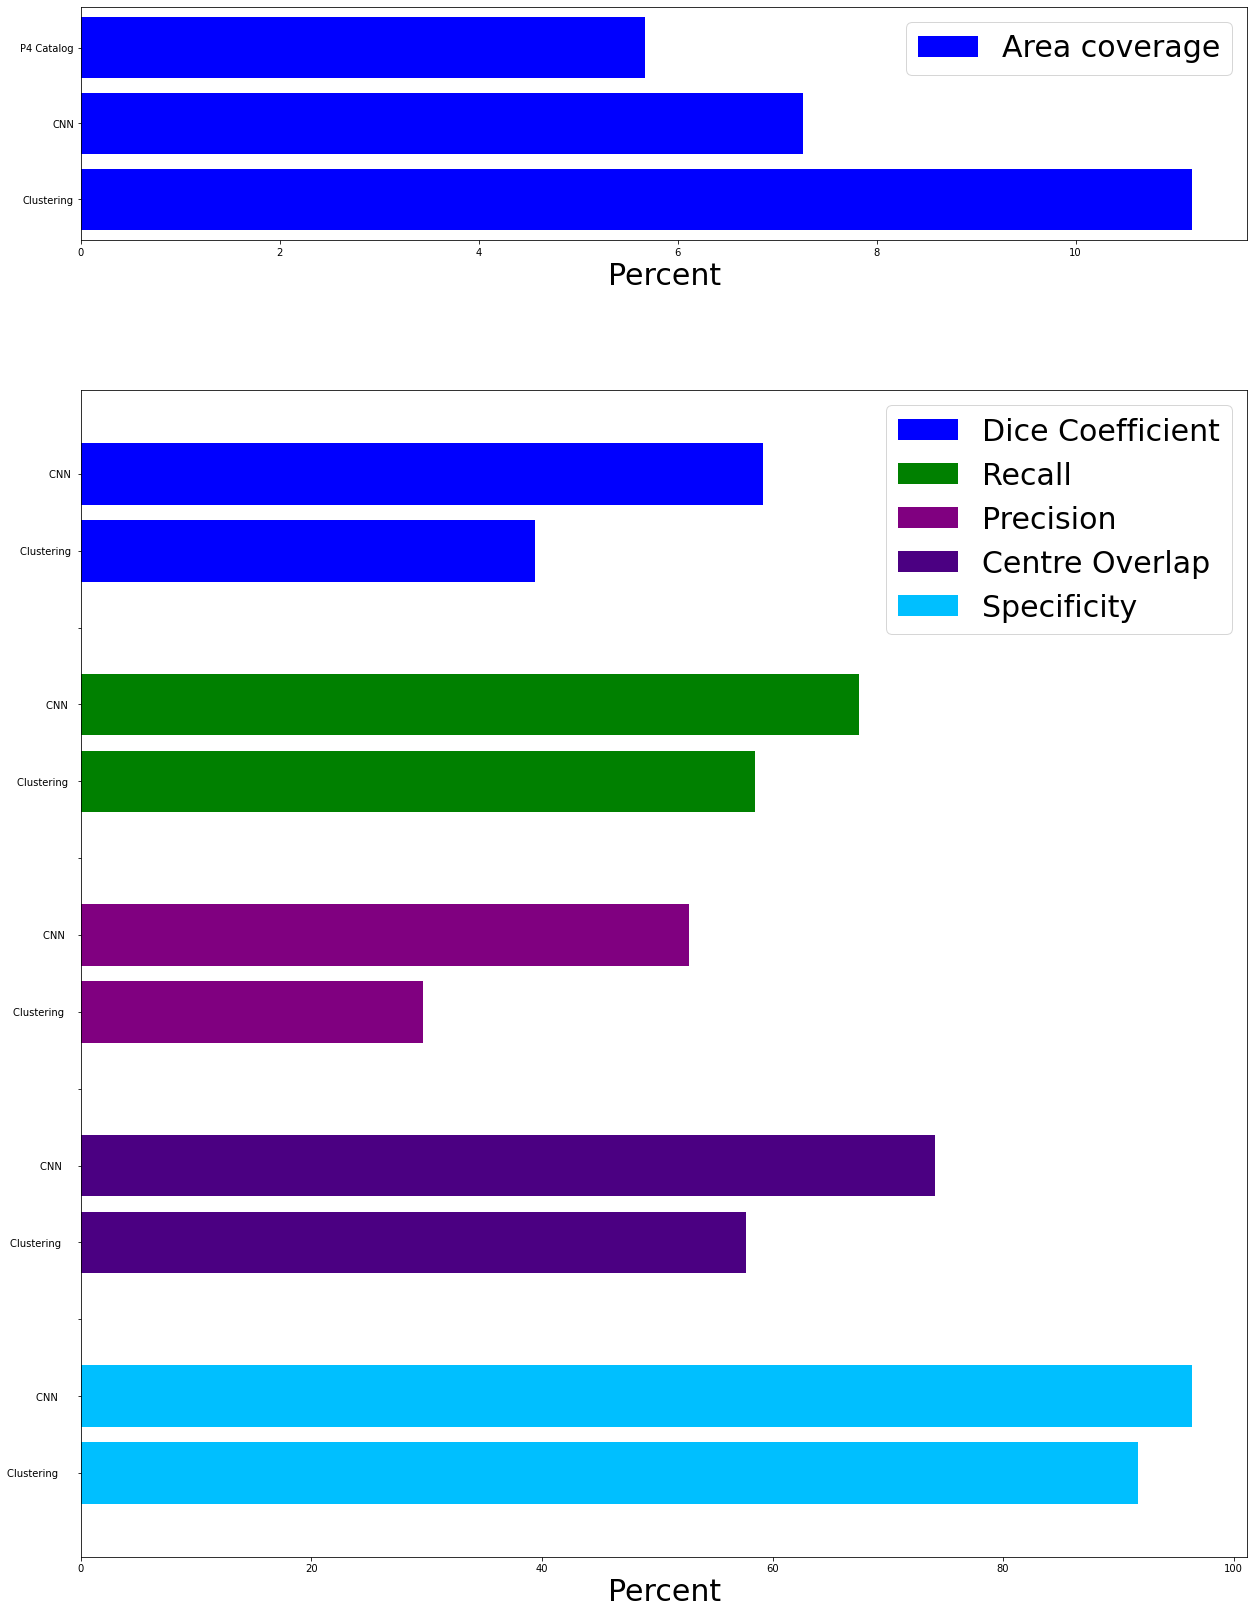

In [6]:
## summary figure with subplots                                                             
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1,figsize=(20,25),gridspec_kw={'height_ratios': [1, 5]})

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

ax2.barh(['Clustering     '],100*Clustering_Specificity,label='Specificity',color='deepskyblue')
ax2.barh(['CNN     '],100*CNN_Specificity,color='deepskyblue')
ax2.barh(['    '],[0])
ax2.barh(['Clustering    '],100*Clustering_TotalCentresCorrect,label='Centre Overlap',color='indigo')
ax2.barh(['CNN    '],100*CNN_TotalCentresCorrect,color='indigo')
ax2.barh(['   '],[0])
ax2.barh(['Clustering   '],100*Clustering_Precision,label='Precision',color='purple')
ax2.barh(['CNN   '],100*CNN_Precision,color='purple')
ax2.barh(['  '],[0])
ax2.barh(['Clustering  '],100*Clustering_Recall,label='Recall',color='green')
ax2.barh(['CNN  '],100*CNN_Recall,color='green')
ax2.barh([' '],[0])
ax2.barh(['Clustering '],100*ClusteringDice,label='Dice Coefficient',color='blue')
ax2.barh(['CNN '],100*CNNDice,color='blue')
#plt.barh([''],[0])
ax1.barh(['Clustering'],100*ClusteringArea/TotalPixelsClustering,label='Area coverage',color='blue')
ax1.barh(['CNN'],100*CNNArea/TotalPixels,color='blue')
ax1.barh(['P4 Catalog'],100*HumanArea/TotalPixels,color='blue')

print(HumanArea/TotalPixels,CNNArea/TotalPixels,ClusteringArea/TotalPixelsClustering)

ax1.set_xlabel('Percent',fontsize=30)
ax2.set_xlabel('Percent',fontsize=30)
#plt.ylabel('Percent (%)',fontsize=40)
ax=plt.gca()
#ax.set_xlim(0,1)
#ax.set_ylim(0,1)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],fontsize=30,loc='upper right')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1],fontsize=30,loc='upper right')

plt.tight_layout(pad=10.0)
plt.savefig(FiguresPath+'Figure6.pdf')
plt.show()

/home/mdmcdonn/anaconda3/envs/HiRISE_ML/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


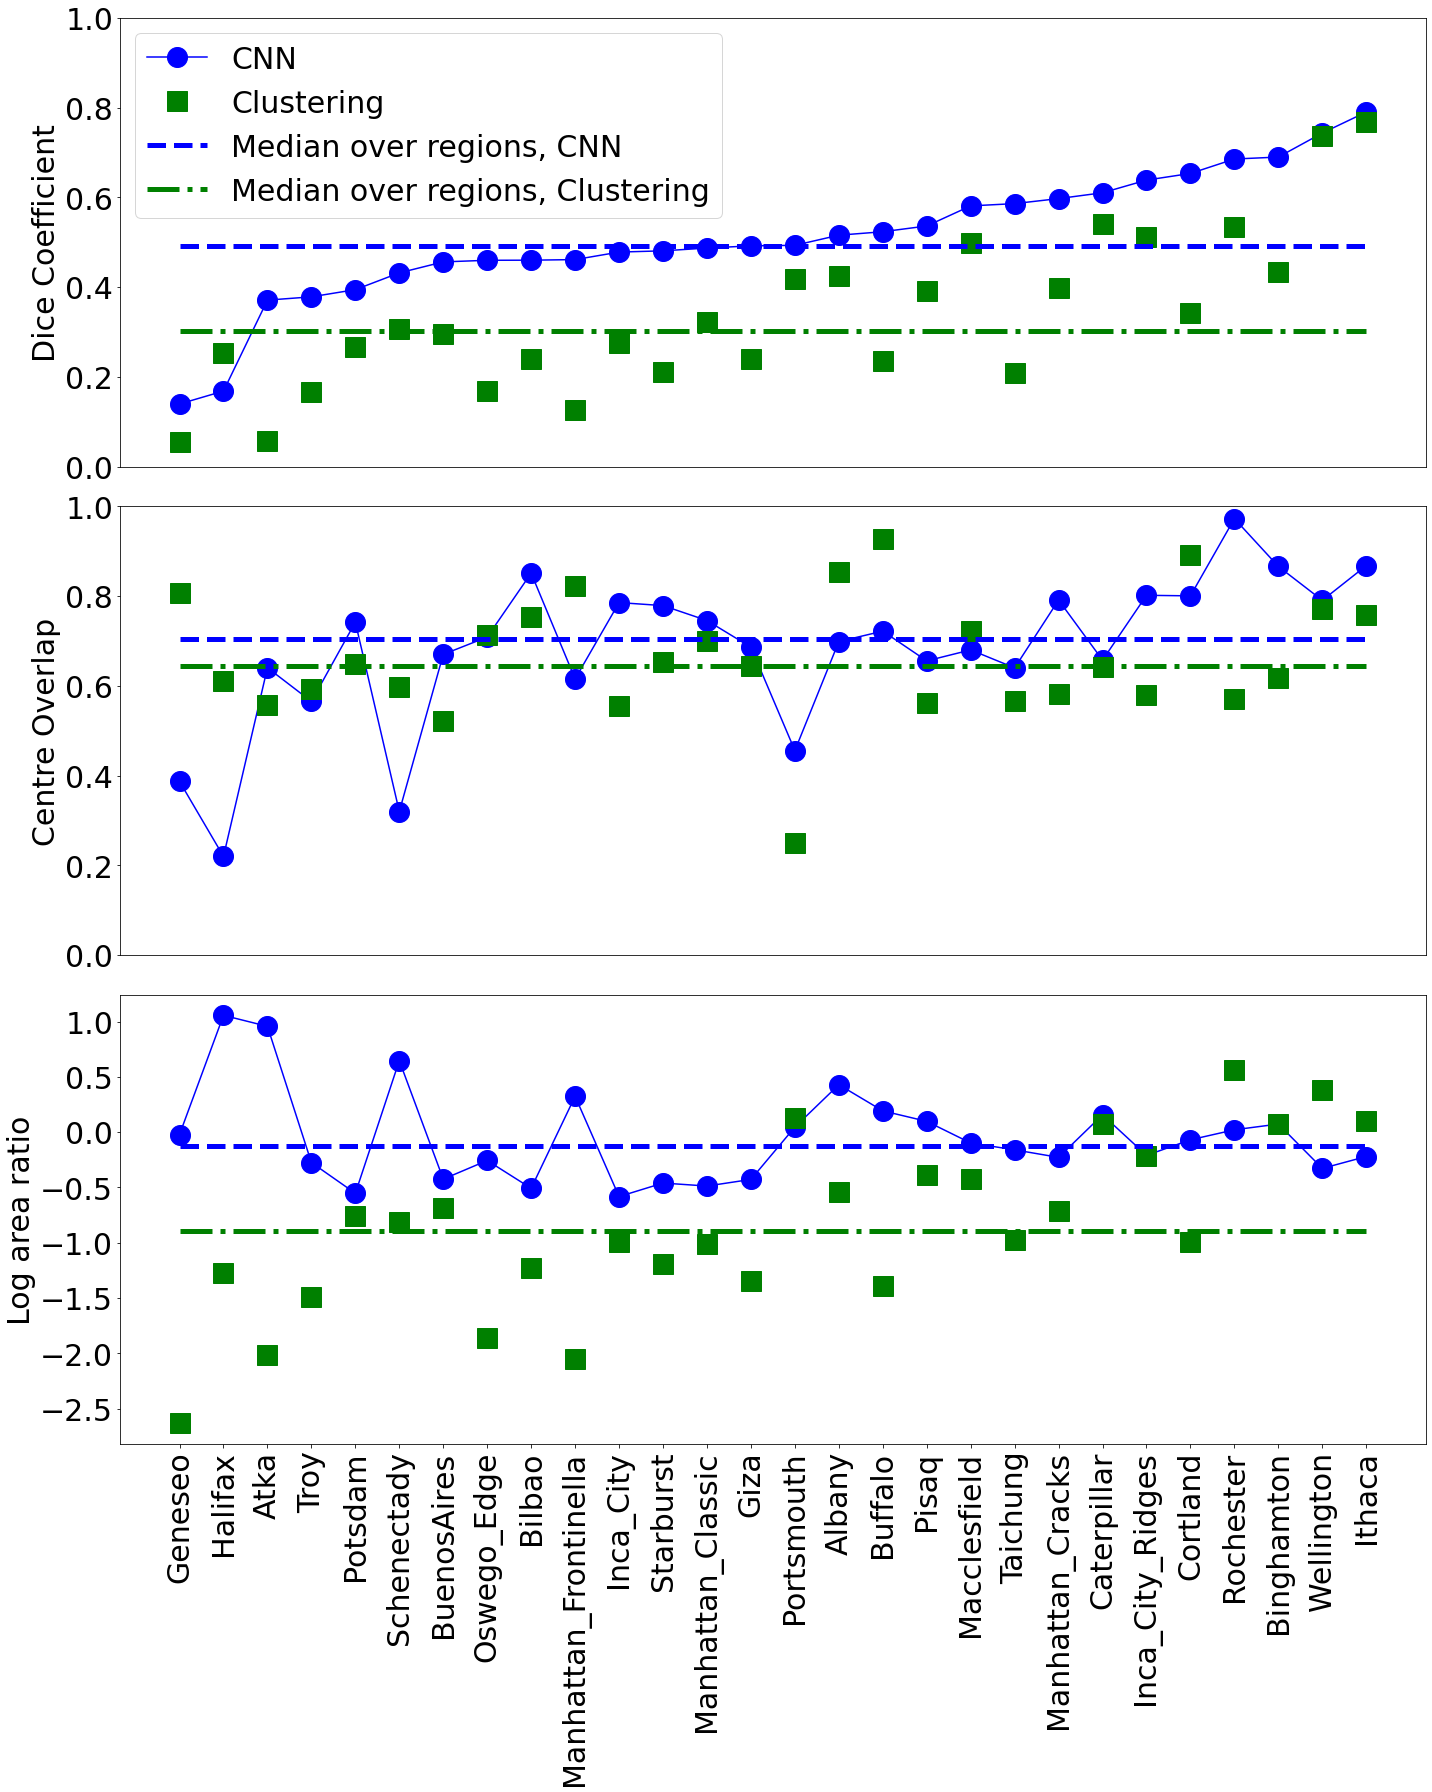

In [7]:
#regional summary
fig, [ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1,figsize=(20,25))

#plot Dice coefficient
ax1.plot(ML_df['Region Dice'],marker='o',markersize=20,label='CNN',color='b')
ax1.plot(Clustering_df['Region Dice'],'s',markersize=20,label='Clustering',color='g')
ax1.plot(ML_df['Region Dice'].median()*np.ones(ML_df['Region Dice'].shape[0]),'--b',label='Median over regions, CNN',linewidth=5)
ax1.plot(Clustering_df['Region Dice'].median()*np.ones(Clustering_df['Region Dice'].shape[0]),'-.g',label='Median over regions, Clustering',linewidth=5)

#plot centre overlap
ax2.plot(ML_df['Region Centre Correct Fraction'],'-o',markersize=20,label='CNN',color='b')
ax2.plot(Clustering_df['Region Centre Correct Fraction'],'s',markersize=20,label='CNN',color='g')
ax2.plot(ML_df['Region Centre Correct Fraction'].median()*np.ones(ML_df['Region Centre Correct Fraction'].shape[0]),'--b',label='Median over regions, CNN',linewidth=5)
ax2.plot(Clustering_df['Region Centre Correct Fraction'].median()*np.ones(Clustering_df['Region Centre Correct Fraction'].shape[0]),'-.g',label='Median over regions, Clustering',linewidth=5)

#plot log area ratio
ax3.plot(np.log(ML_df['Region Area Ratio']),'-o',markersize=20,color='b',label='CNN')
ax3.plot(np.log(Clustering_df['Region Area Ratio']),'s',markersize=20,label='Clustering',color='g')
ax3.plot(np.log(ML_df['Region Area Ratio'].median())*np.ones(ML_df['Region Area Ratio'].shape[0]),'--b',label='Median over regions, CNN',linewidth=5)
ax3.plot(np.log(Clustering_df['Region Area Ratio'].median())*np.ones(Clustering_df['Region Area Ratio'].shape[0]),'-.g',label='Median over regions, Clustering',linewidth=5)

ax1.set_xticklabels([])
ax1.set_xticks([])
ax2.set_xticklabels([])
ax2.set_xticks([])
ax3.set_xticklabels(ML_df.index,rotation=90,fontsize=30)
ax1.set_ylabel('Dice Coefficient',fontsize=30)
ax2.set_ylabel('Centre Overlap',fontsize=30)
ax3.set_ylabel('Log area ratio',fontsize=30)
ax1.legend(fontsize=30)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.tight_layout()
plt.savefig(FiguresPath+'Figure7.pdf')
plt.show()

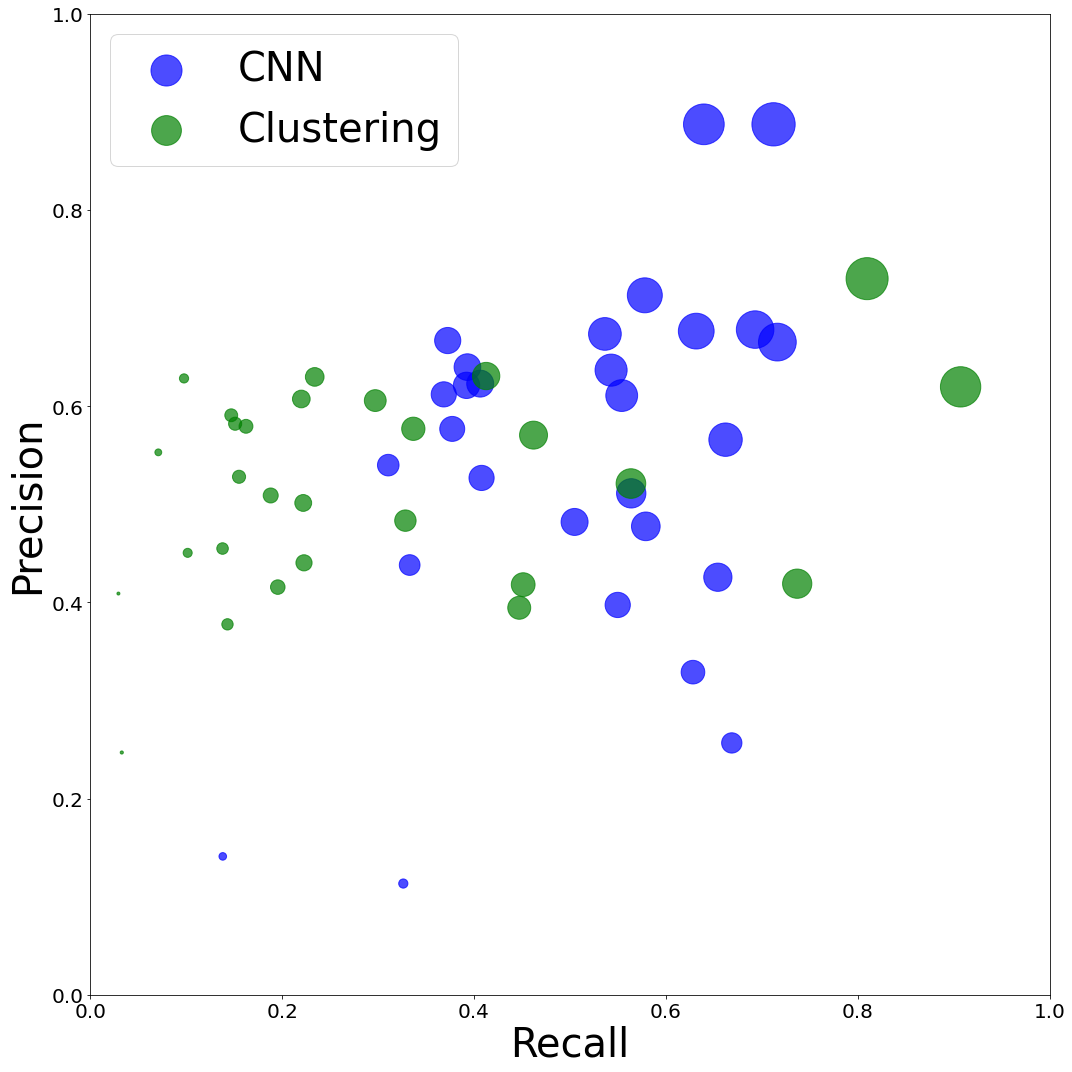

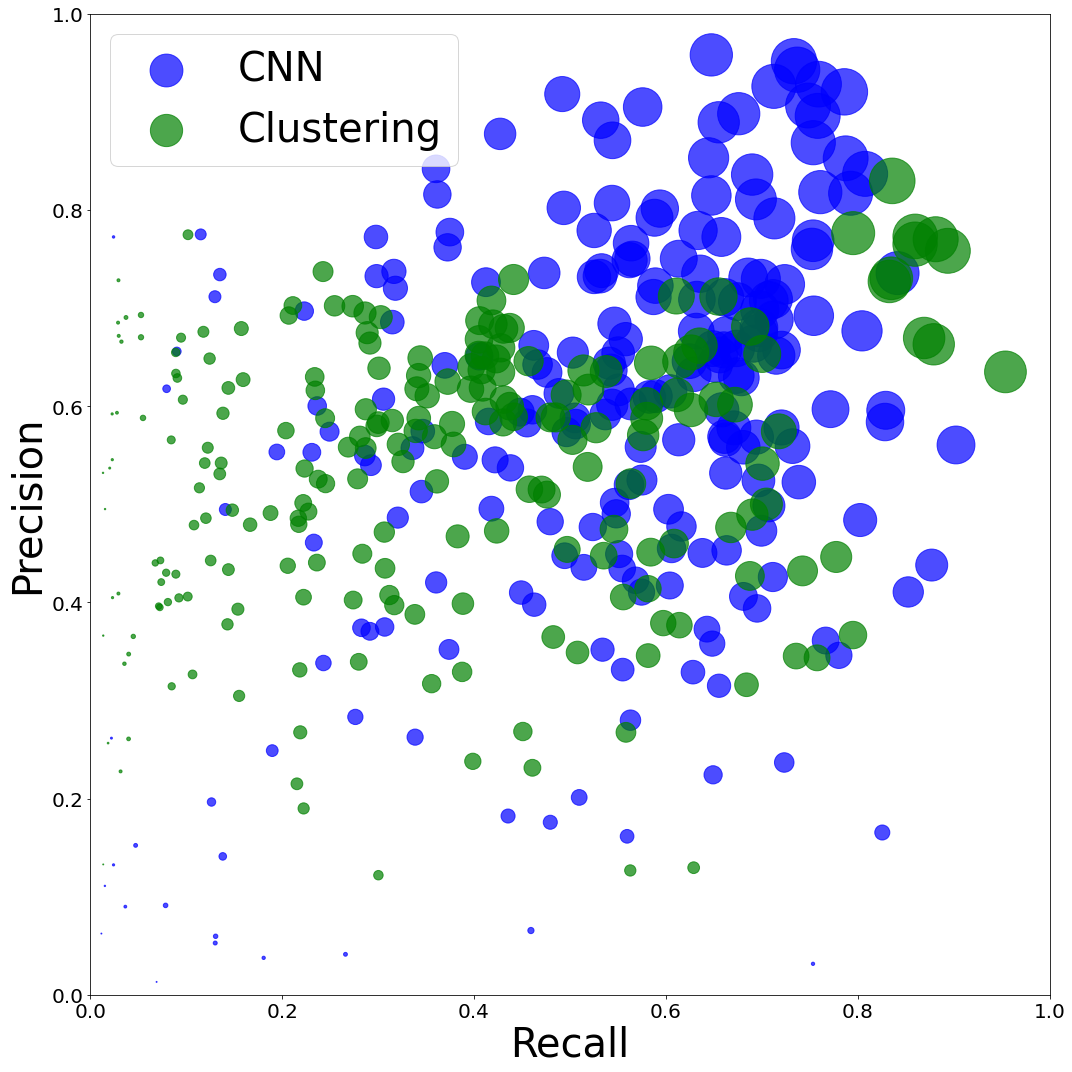

In [8]:
#more regional summmary
fig=plt.figure(figsize=(15,15))

plt.scatter('Region Precision','Region Recall',s='Bubblesize',data=ML_df,alpha=0.7,label='CNN',color='blue')
plt.scatter('Region Precision','Region Recall',s='Bubblesize',data=Clustering_df,alpha=0.7,label='Clustering',color='green')

plt.xlabel('Recall',fontsize=40)
plt.ylabel('Precision',fontsize=40)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
plt.savefig(FiguresPath+'Figure8.pdf')
plt.show()

fig=plt.figure(figsize=(15,15))


plt.scatter('Precision','Recall',s='Bubblesize',data=ML_image_df,alpha=0.7,label='CNN',color='blue')
plt.scatter('Precision','Recall',s='Bubblesize',data=Clustering_image_df,alpha=0.7,label='Clustering',color='green')

plt.xlabel('Recall',fontsize=40)
plt.ylabel('Precision',fontsize=40)
ax=plt.gca()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
plt.savefig(FiguresPath+'Figure10.pdf')
plt.show()

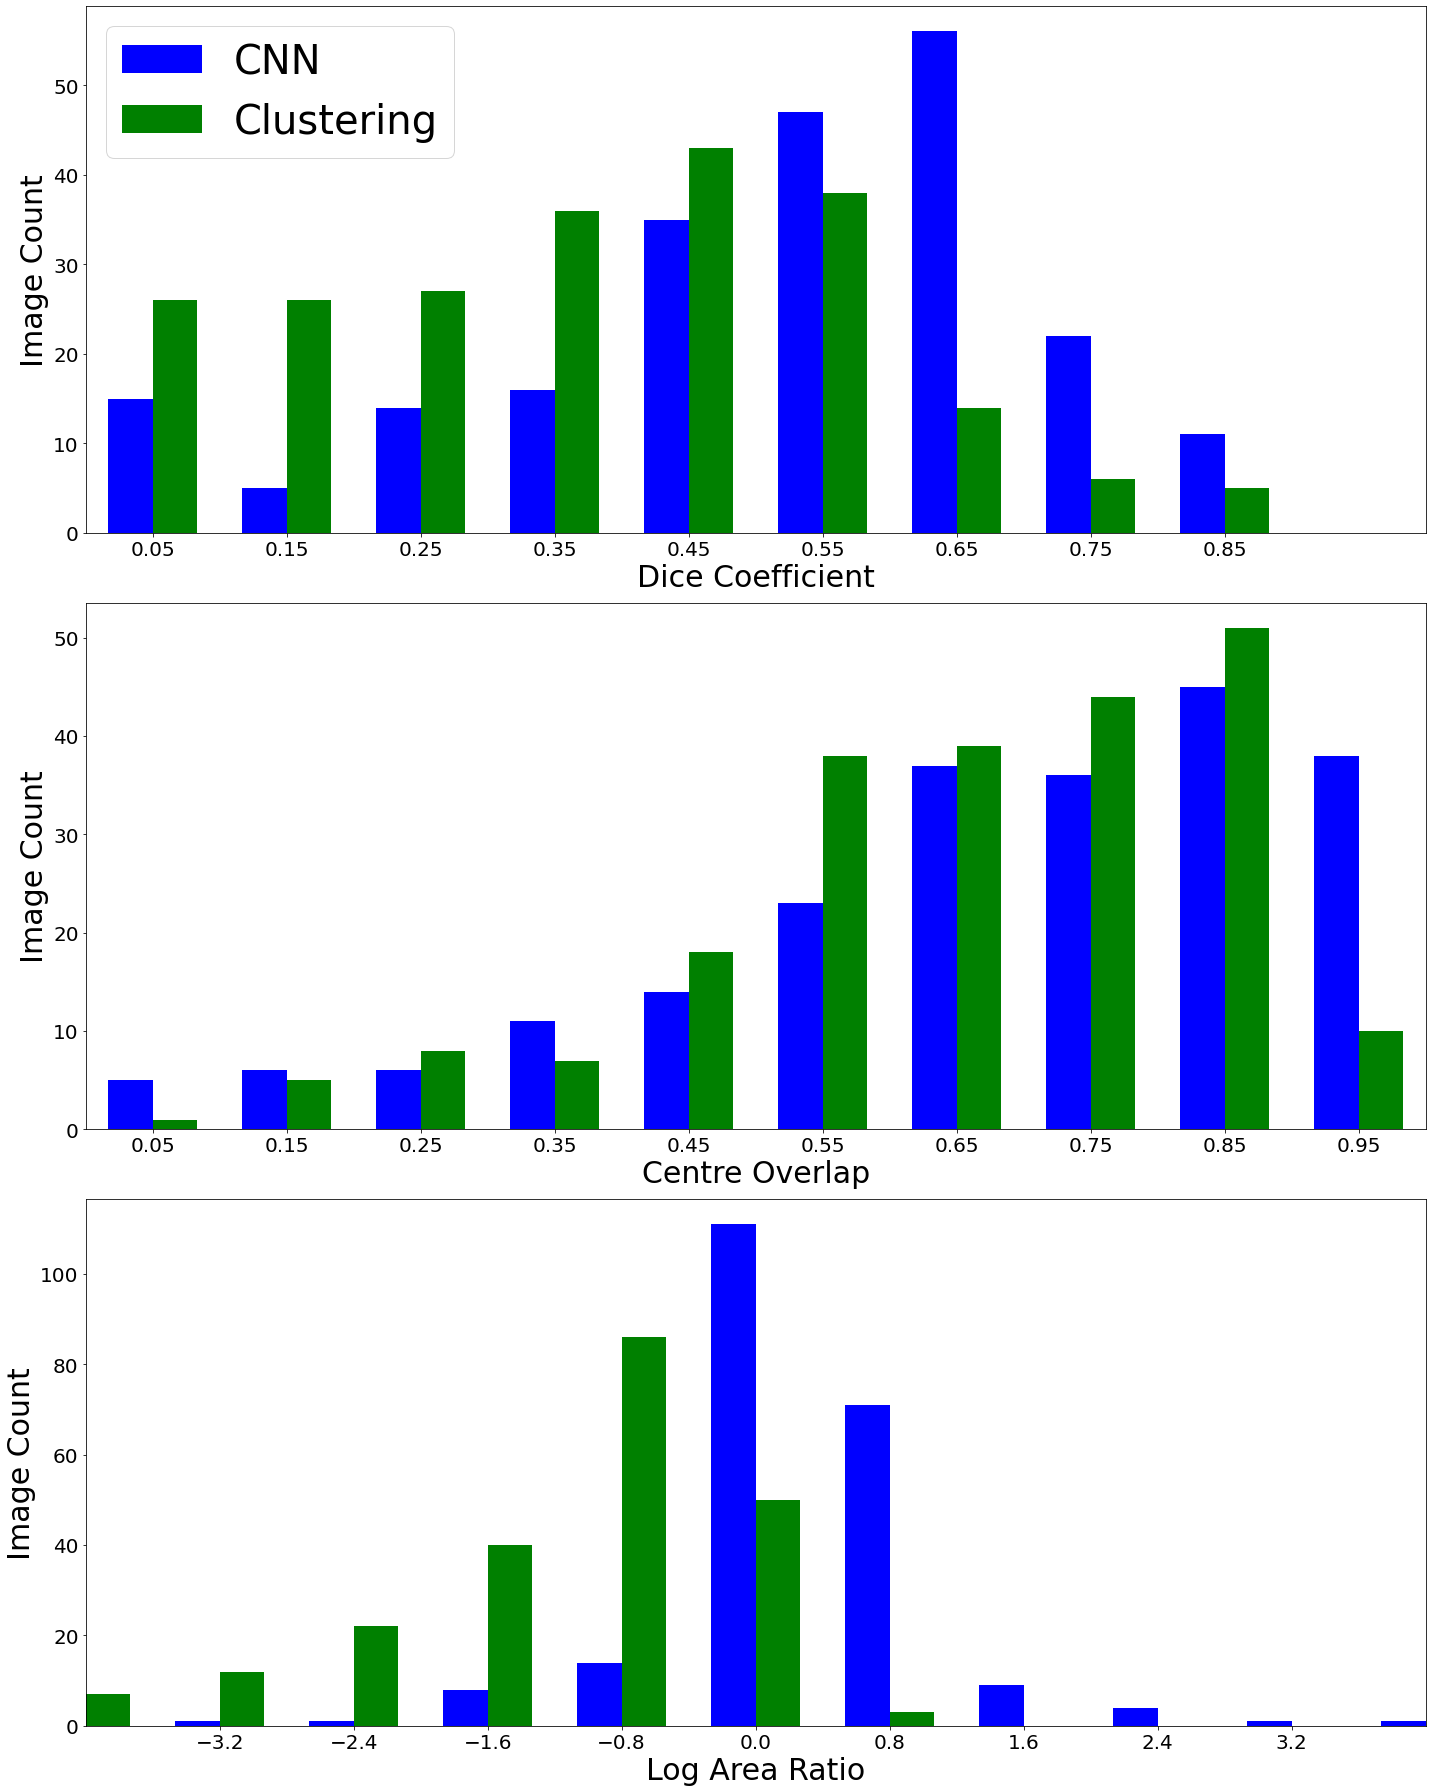

In [9]:
#Per image histograms
fig, [ax1,ax2,ax3] = plt.subplots(nrows=3, ncols=1,figsize=(20,25))

#plot Dice coefficient
aa=Clustering_image_df.dropna()
ax1.hist(ML_image_df['Dice']-0.05/3,bins=np.arange(0,1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333)
ax1.hist(aa['Dice']+0.05/3,bins=np.arange(0,1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax1.set_xlim(0,1)
ax1.set_xticks(np.arange(0.05,0.95,0.1))
ax1.set_xlabel('Dice Coefficient',fontsize=30)
ax1.set_ylabel('Image Count',fontsize=30)
ax1.legend(fontsize=40,loc='upper left')
#ax1.set_ylim(0,1)

#plot centre overlap
ax2.hist(ML_image_df['Centre Correct Fraction']-0.05/3,bins=np.arange(0,1.1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333)
ax2.hist(aa['Centre Correct Fraction']+0.05/3,bins=np.arange(0,1.1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax2.set_xlim(0,1)
ax2.set_xticks(np.arange(0.05,1.05,0.1))
ax2.set_xlabel('Centre Overlap',fontsize=30)
ax2.set_ylabel('Image Count',fontsize=30)
#ax2.set_ylim(0,1)

#area ratio
ax3.hist(np.log(ML_image_df['Area Ratio'])+8/30,bins=np.arange(-4,4+8/30,8/10)+8/30,alpha=1,label='CNN',color='b',rwidth=0.333)
ax3.hist(np.log(aa['Area Ratio'])-8/30,bins=np.arange(-4,4+8/30,8/10)-8/30,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax3.set_xlim(-4,4)
ax3.set_xticks(np.arange(-4+8/10,4,8/10))
#ax3.set_xticks(np.arange(0.05,0.95,0.1))
ax3.set_xlabel('Log Area Ratio',fontsize=30)
ax3.set_ylabel('Image Count',fontsize=30)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.tight_layout()
plt.savefig(FiguresPath+'Figure9.pdf')
fig.show()

In [10]:
#solar longitude
r1 = np.corrcoef(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice'])
r2=scipy.stats.pearsonr(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice'])    # Pearson's r
r3=scipy.stats.spearmanr(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice'])   # Spearman's rho
r4=scipy.stats.kendalltau(ML_image_df['SOLAR_LONGITUDE'], ML_image_df['Dice']) 

print(r1)
print(r2)
print(r3)
print(r4)

r1 = np.corrcoef(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice'])
r2=scipy.stats.pearsonr(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice'])    # Pearson's r
r3=scipy.stats.spearmanr(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice'])   # Spearman's rho
r4=scipy.stats.kendalltau(Clustering_image_df['SOLAR_LONGITUDE'], Clustering_image_df['Dice']) 

print(r1)
print(r2)
print(r3)
print(r4)

[[ 1.         -0.22898109]
 [-0.22898109  1.        ]]
(-0.22898108807667147, 0.000602611902460573)
SpearmanrResult(correlation=-0.1858594505653329, pvalue=0.005579519631377707)
KendalltauResult(correlation=-0.11921020156314274, pvalue=0.008354815343347423)
[[ 1.         -0.31995262]
 [-0.31995262  1.        ]]
(-0.31995261580619083, 1.1871800352270636e-06)
SpearmanrResult(correlation=-0.292147598029951, pvalue=1.0093464358857227e-05)
KendalltauResult(correlation=-0.20156314273961334, pvalue=8.221041911792538e-06)


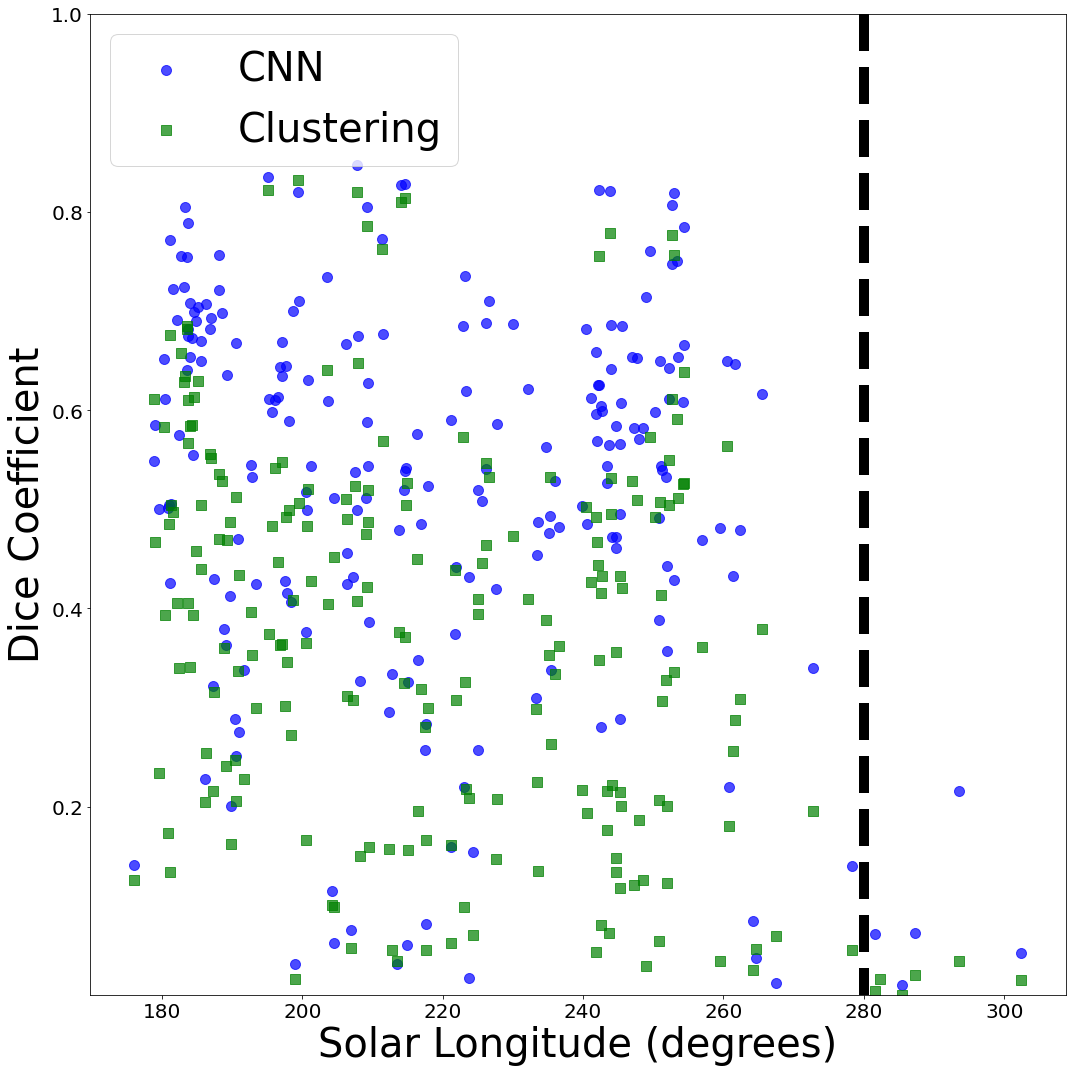

In [11]:
#solar longitude plot
fig=plt.figure(figsize=(15,15))
plt.scatter('SOLAR_LONGITUDE','Dice',data=ML_image_df,s=100,alpha=0.7,label='CNN',color='blue')
plt.scatter('SOLAR_LONGITUDE','Dice',data=Clustering_image_df,s=100,alpha=0.7,label='Clustering',color='green',marker='s')


plt.xlabel('Solar Longitude (degrees)',fontsize=40)
plt.ylabel('Dice Coefficient',fontsize=40)
plt.plot([280,280],[0,1],color='k',linestyle='--',linewidth=10)
ax=plt.gca()
#ax.set_xlim(0,1)
ax.set_ylim(0.01,1)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
plt.savefig(FiguresPath+'Figure11a.pdf')
plt.show()

In [12]:
ML_image_df

,Region name,Image name,JI,Dice,Area Ratio,Recall,Precision,TP,TN,FP,...,roi_name,minimal_distance,lat_WORD,lon_WORD,time,MY,Centre Correct Fraction,Centre Correct Count,Centre P4 Count,Bubblesize
ESP_012225_0980,Albany,ESP_012225_0980,0.230009,0.373995,2.011269,0.279973,0.563101,1558016.0,55724732.0,1208836.0,...,Albany,2.061556,-81.93,60.4,2009-03-06 01:35:09,29,0.477056,1050.0,2201.0,419
ESP_012291_0980,Albany,ESP_012291_0980,0.351103,0.519728,1.331670,0.455005,0.605917,2408326.0,55639064.0,1566354.0,...,Albany,1.011477,-81.93,60.4,2009-03-11 05:00:23,29,0.678094,1622.0,2392.0,810
ESP_012304_0980,Albany,ESP_012304_0980,0.341188,0.508785,1.676364,0.406145,0.680847,1975660.0,56708008.0,926107.0,...,Albany,1.305858,-81.93,60.4,2009-03-12 05:19:04,29,0.646119,1698.0,2628.0,776
ESP_012436_0980,Albany,ESP_012436_0980,0.450272,0.620949,1.160684,0.577967,0.670837,2070233.0,50108232.0,1015812.0,...,Albany,1.421614,-81.93,60.4,2009-03-22 12:10:02,29,0.846598,2053.0,2425.0,1156
ESP_012647_0980,Albany,ESP_012647_0980,0.432500,0.603840,1.658030,0.484015,0.802512,1704307.0,58557848.0,419409.0,...,Albany,1.215714,-81.93,60.4,2009-04-07 22:46:33,29,0.794303,2649.0,3335.0,1093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESP_012838_0950,Troy,ESP_012838_0950,0.217165,0.356838,3.054340,0.236834,0.723371,434213.0,148313280.0,166050.0,...,Troy,1.837027,-85.02,259.0,2009-04-22 19:56:56,29,0.452381,475.0,1050.0,382
ESP_013049_0950,Troy,ESP_013049_0950,0.314854,0.478918,1.399576,0.410553,0.574600,378865.0,30124940.0,280489.0,...,Troy,1.516036,-85.02,259.0,2009-05-09 06:31:33,29,0.533456,582.0,1091.0,688
ESP_013260_0950,Troy,ESP_013260_0950,0.204388,0.339405,0.394137,0.600270,0.236589,2668722.0,137255664.0,8611283.0,...,Troy,1.663501,-85.02,259.0,2009-05-25 17:07:34,29,0.728353,429.0,589.0,345
ESP_011296_0975,Wellington,ESP_011296_0975,0.378149,0.548778,1.095791,0.524791,0.575061,1499191.0,38008488.0,1107819.0,...,Wellington,0.893554,-82.20,225.2,2008-12-23 16:15:26,29,0.617937,3390.0,5486.0,903


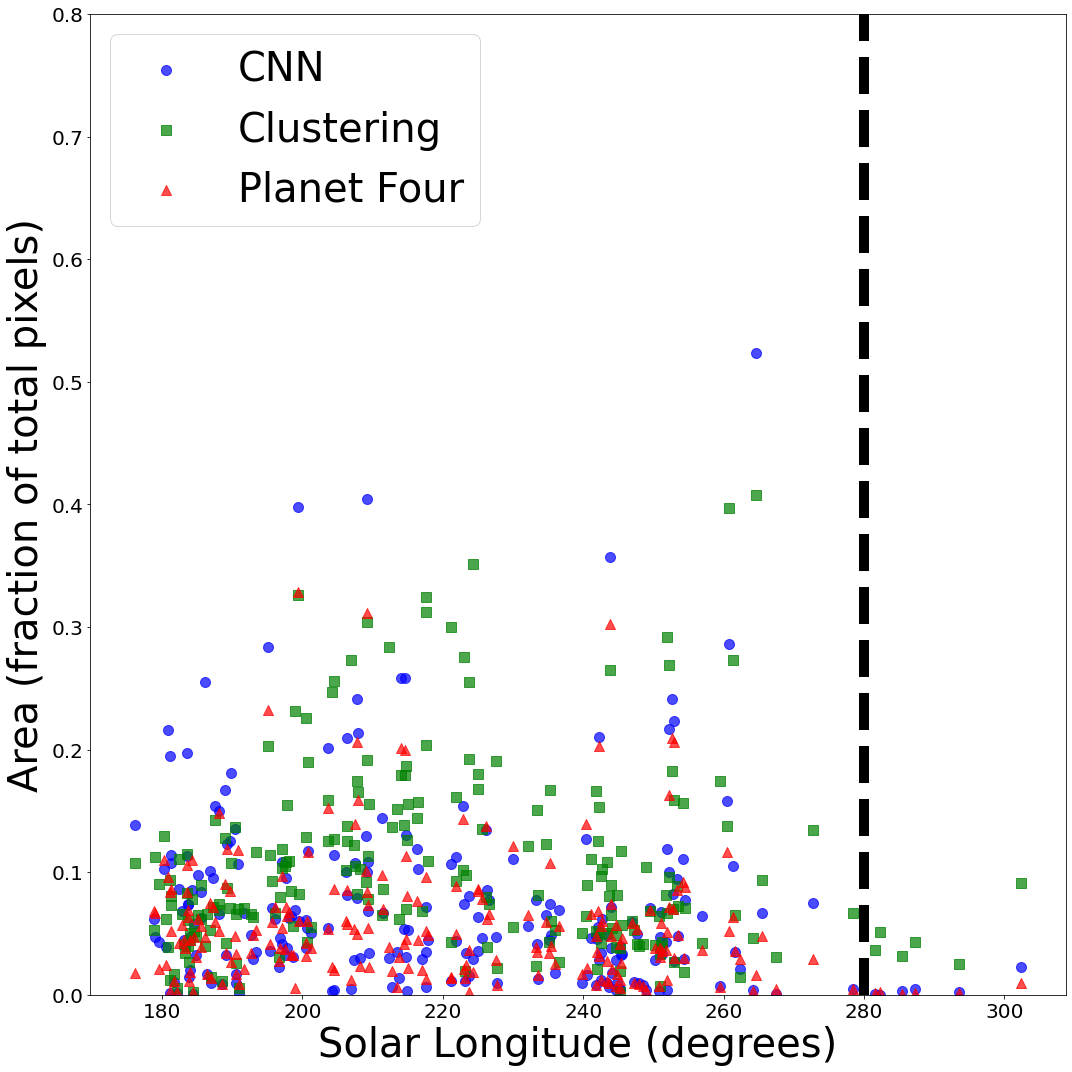

In [13]:
ML_image_df['Area_P4']=(ML_image_df['TP']+ML_image_df['FN'])/(ML_image_df['TP']+ML_image_df['FN']+ML_image_df['FP']+ML_image_df['TN'])
ML_image_df['Area_CNN']=(ML_image_df['TP']+ML_image_df['FP'])/(ML_image_df['TP']+ML_image_df['FN']+ML_image_df['FP']+ML_image_df['TN'])
Clustering_image_df['Area_cl']=(Clustering_image_df['TP']+Clustering_image_df['FP'])/(Clustering_image_df['TP']+Clustering_image_df['FN']+Clustering_image_df['FP']+Clustering_image_df['TN'])

fig=plt.figure(figsize=(15,15))
plt.scatter('SOLAR_LONGITUDE','Area_CNN',data=ML_image_df,s=100,alpha=0.7,label='CNN',color='blue')
plt.scatter('SOLAR_LONGITUDE','Area_cl',data=Clustering_image_df,s=100,alpha=0.7,label='Clustering',color='green',marker='s')
plt.scatter('SOLAR_LONGITUDE','Area_P4',data=ML_image_df,s=100,alpha=0.7,label='Planet Four',color='red',marker='^')


plt.xlabel('Solar Longitude (degrees)',fontsize=40)
plt.ylabel('Area (fraction of total pixels)',fontsize=40)
plt.plot([280,280],[0,1],color='k',linestyle='--',linewidth=10)
ax=plt.gca()
#ax.set_yscale('log')
#ax.set_xlim(0,1)
ax.set_ylim(0,0.8)
ax.legend(fontsize=40,loc='upper left')
plt.tight_layout()
plt.savefig(FiguresPath+'Figure11b.pdf')
plt.show()

In [14]:
ML_Tiles_df = pd.read_csv(ResultsPath+'SemanticSegmenterCNN_LORO_by_tiles.csv')
ML_Tiles_df.shape
ML_Tiles_df['Dice']=(2*ML_Tiles_df['TP']+1e-10)/(1e-10+2*ML_Tiles_df['TP']+ML_Tiles_df['FP']+ML_Tiles_df['FN'])
ML_Tiles_df['area ratio']=(1e-10+(1e-10+ML_Tiles_df['TP']+ML_Tiles_df['FN'])/(1e-10++ML_Tiles_df['TP']+ML_Tiles_df['FP']))

Clustering_Tiles_df = pd.read_csv(ClusteringPath+'Clustering_by_tiles.csv')
Clustering_Tiles_df.shape
Clustering_Tiles_df['Dice']=(2*Clustering_Tiles_df['TP']+1e-10)/(1e-10+2*Clustering_Tiles_df['TP']+Clustering_Tiles_df['FP']+Clustering_Tiles_df['FN'])
Clustering_Tiles_df['area ratio']=(1e-10+(1e-10+Clustering_Tiles_df['TP']+Clustering_Tiles_df['FN'])/(1e-10+Clustering_Tiles_df['TP']+Clustering_Tiles_df['FP']))


assert ML_Tiles_df.isnull().values.any()==False

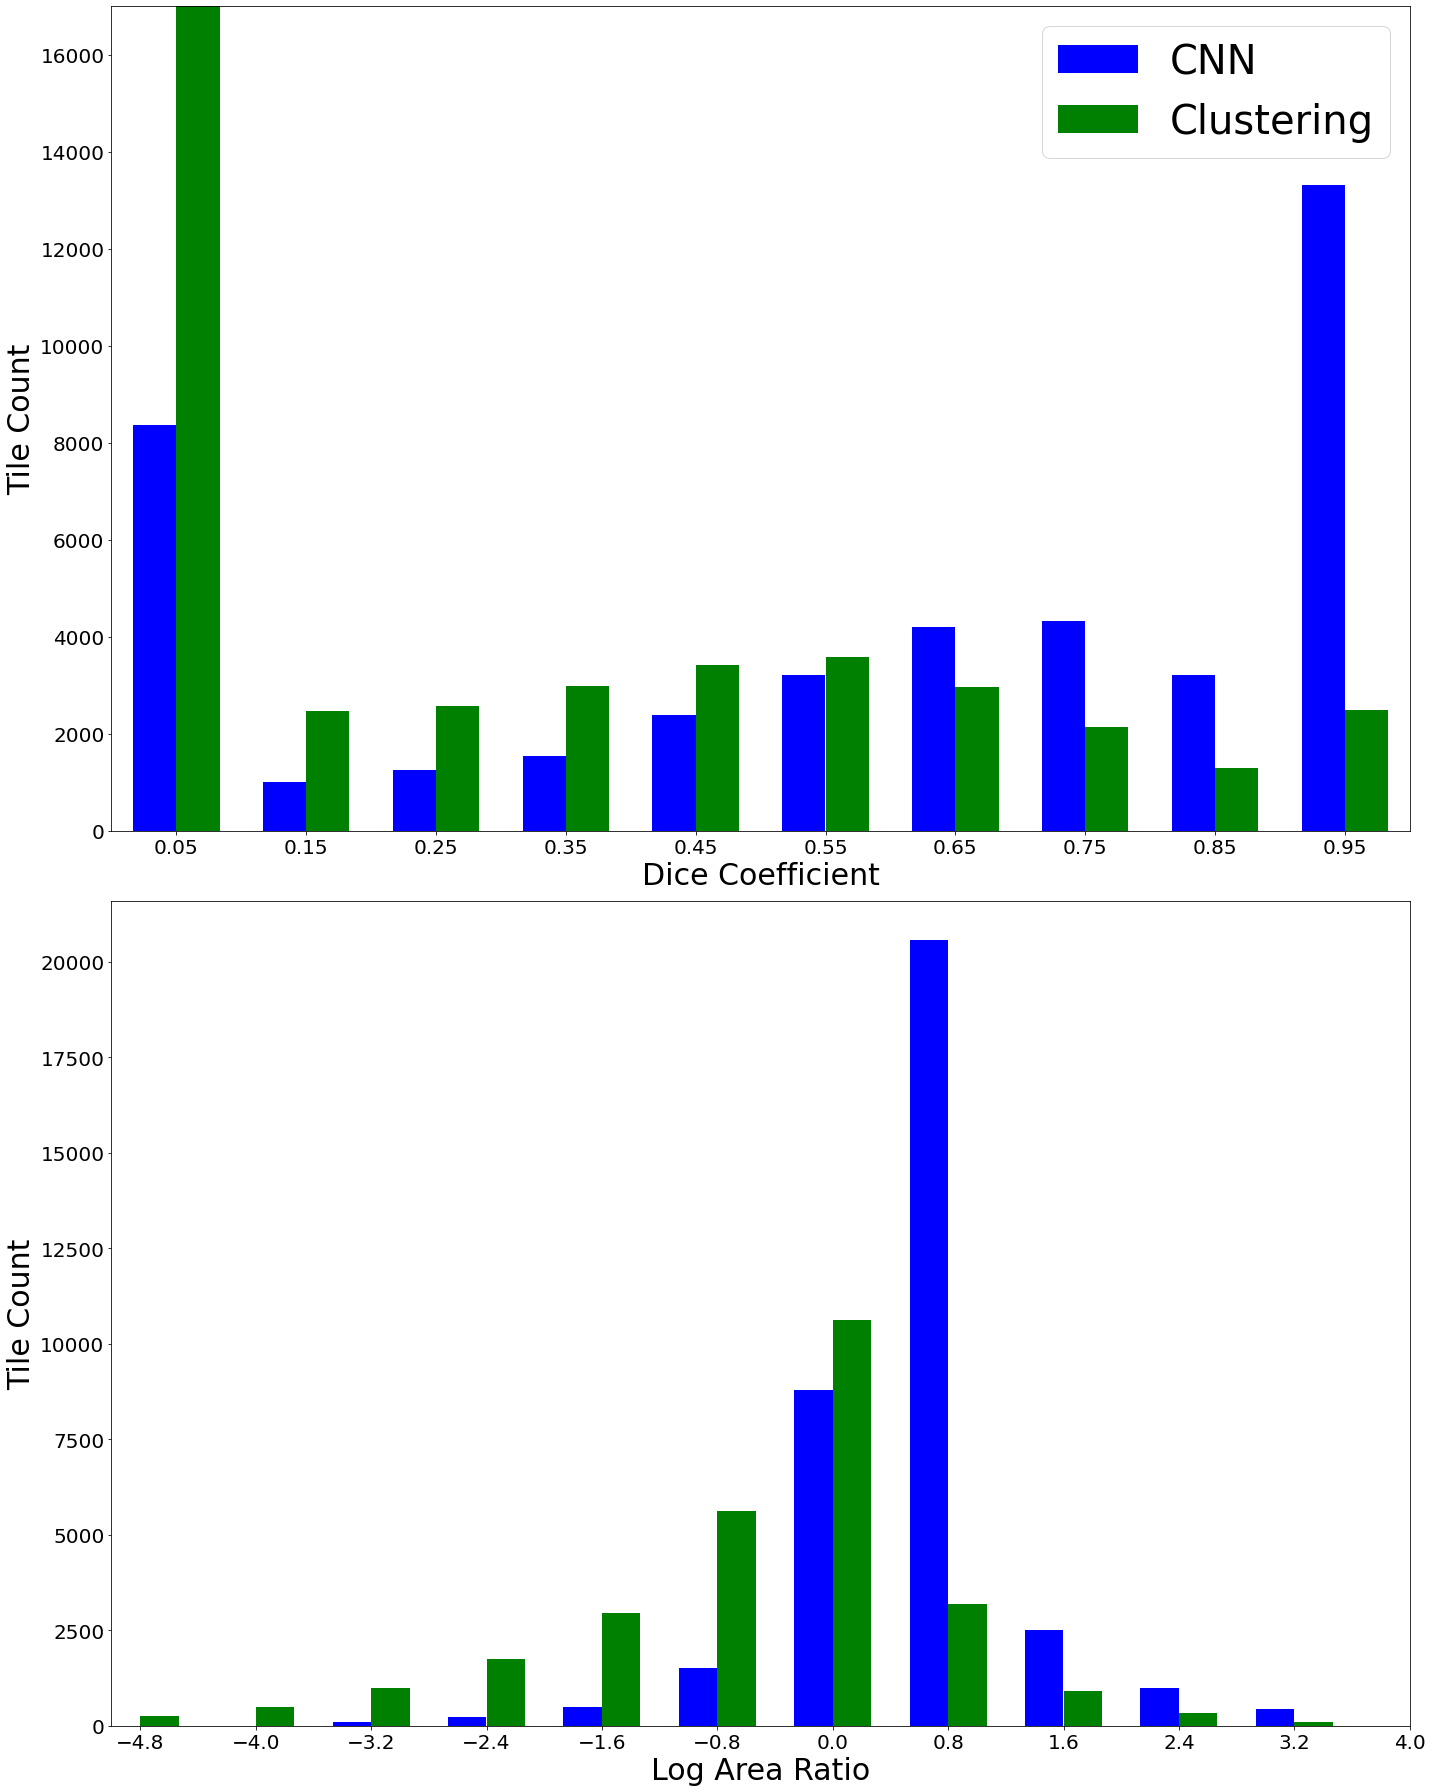

In [15]:
#Per tile histograms
fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1,figsize=(20,25))

#plot Dice coefficient
aa=Clustering_Tiles_df.dropna()
ax1.hist(ML_Tiles_df['Dice']-0.05/3,bins=np.arange(0,1.1,0.1)-0.05/3,alpha=1,label='CNN',color='b',rwidth=0.333)
ax1.hist(aa['Dice']+0.05/3,bins=np.arange(0,1.1,0.1)+0.05/3,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax1.set_xlim(0,1)
ax1.set_xticks(np.arange(0.05,1,0.1))
ax1.set_xticks(np.arange(0.05,1.05,0.1))
ax1.set_xlabel('Dice Coefficient',fontsize=30)
ax1.set_ylabel('Tile Count',fontsize=30)
ax1.legend(fontsize=40,loc='upper right')
ax1.set_ylim(0,17000)

ax2.hist(np.log(ML_Tiles_df['area ratio'])+8/30,bins=np.arange(-4,4,8/10)+8/30,alpha=1,label='CNN',color='b',rwidth=0.333)
ax2.hist(np.log(aa['area ratio'])-8/30,bins=np.arange(-4.8,4.8,8/10)-8/30,alpha=1,label='Clustering',color='g',rwidth=0.333)
ax2.set_xlim(-5,4)
ax2.set_xticks(np.arange(-4.8,4.8,8/10))
#ax3.set_xticks(np.arange(0.05,0.95,0.1))
ax2.set_xlabel('Log Area Ratio',fontsize=30)
ax2.set_ylabel('Tile Count',fontsize=30)


matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.tight_layout()
plt.savefig(FiguresPath+'Figure12.pdf')
plt.show()